In [0]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
path ='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/tecno/titanic.csv'

In [140]:
df = pd.read_csv(path, sep='\t')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [141]:
# Drop some columns which is not relevant to the analysis (they are not numeric)
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Sex          156 non-null    object 
 4   Age          126 non-null    float64
 5   SibSp        156 non-null    int64  
 6   Parch        156 non-null    int64  
 7   Fare         156 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 11.1+ KB


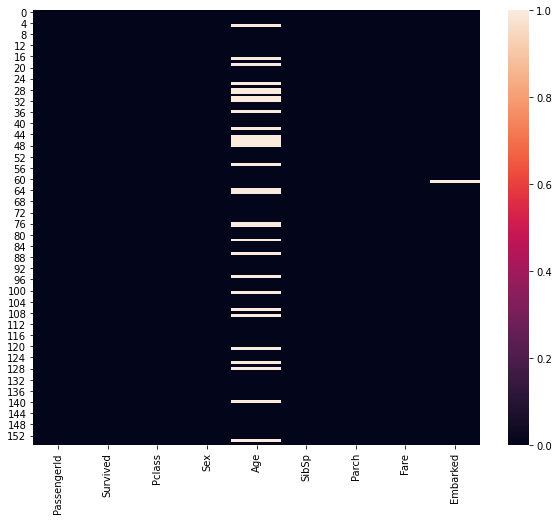

In [143]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());

Interpolate for missing values

This means you can deduce the missing values by interpolating  existing values.

For example, if we have the series 1, 3, 4, ?, 6, 8,….What is the missing value

Simply put, it is midpoint between 4 and 6. So the result it (4+6)/2 = 5

To interpolate missing values for Age, use the code below

In [0]:
# To replace missing values with interpolated values, for example Age
df['Age'] = df['Age'].interpolate()

In [0]:
# Drop all rows with missin data
df = df.dropna()

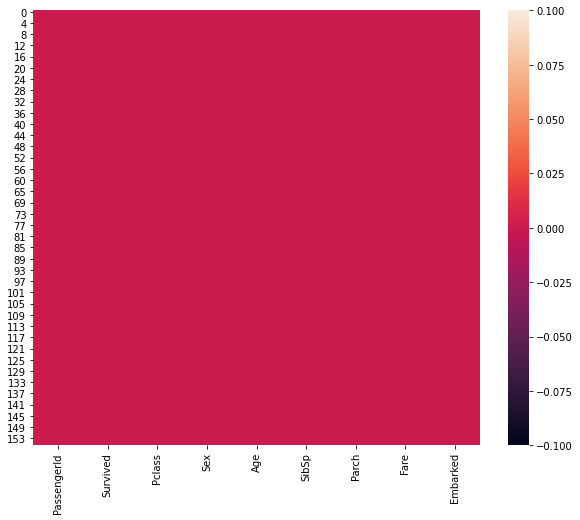

In [146]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());

### Convert categorical values to numeric

Now if you view the dataset properties using df.info(), you will see that the Sex and Embarked columns are not numeric. We we now convert them to numeric. There is a separate tutorial on Converting categorical column to numeric here.

This takes three steps:

First create dummy variables from the categorical columns

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  155 non-null    int64  
 1   Survived     155 non-null    int64  
 2   Pclass       155 non-null    int64  
 3   Sex          155 non-null    object 
 4   Age          155 non-null    float64
 5   SibSp        155 non-null    int64  
 6   Parch        155 non-null    int64  
 7   Fare         155 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 12.1+ KB


In [0]:
# First, create dummy columns from the Embarked and Sex columns
EmbarkedColumnDummy = pd.get_dummies(df['Embarked'])
SexColumnDummy = pd.get_dummies(df['Sex'])

Note: the get_dummies() functions converts categorical variables into dummy indicator variables

Second, we add these dummy columns to the original dataset

In [149]:
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


Third, drop the original categorical columns



In [150]:
# Drop the redundant columns thus converted
df = df.drop(['Sex','Embarked'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


Now you can use df.info() and df.head() to check the dataset

You can also do a heatmap to check for null values.

### Separate the Features and the Classes

We would separate the features (X) and the classes (y). The classes is the target variable we want to predict. In this case, it is the ‘Survived’ column

In [154]:
## Move target variable to the end of the dataframe
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'S', 'female', 'male'],
      dtype='object')

In [0]:
df = df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'S', 'female', 'male','Survived']]

In [0]:
X = df.iloc[:,0:-1]
y = df['Survived']

In [157]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,3,22.00,1,0,7.2500,0,0,1,0,1
1,2,1,38.00,1,0,71.2833,1,0,0,1,0
2,3,3,26.00,0,0,7.9250,0,0,1,1,0
3,4,1,35.00,1,0,53.1000,0,0,1,1,0
4,5,3,35.00,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,22.00,1,0,66.6000,0,0,1,1,0
152,153,3,55.50,0,0,8.0500,0,0,1,0,1
153,154,3,40.50,0,2,14.5000,0,0,1,0,1
154,155,3,45.75,0,0,7.3125,0,0,1,0,1


In [158]:
X.shape

(155, 11)

In [0]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

In [160]:
X_test.shape

(47, 11)

## Build Decision Trees Classifier

In [161]:
# Using simple Decision Tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7872340425531915

A score of 81.6% is pretty good for our classifier! So we’ve done a good job. Let’s try another classifier

### See the Confusion Matrix

Before we go to the next classifier, let’s see the confusion matrix of this classifier. So we know know many true-positives, false positive etc.

First we obtain y_pred, then we import confusion_matrix from sklearn.metrics. The code is given below

In [162]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[31,  4],
       [ 6,  6]])

Perform Classification Using Random Forest Classifier

Now, we would see if we could get a better results using the the Random Forests Classifier.

## Build Random Forest Classifier

In [163]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)


0.7446808510638298

Perform Classification Using Gradient Boosting Classifier

This classifier is available in the ensemble module which we already imported. So we don’t need to import anything

## Build Gradient Boosting Classifier

In [164]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.723404255319149

Tune the Classifier

We could try to improve the gradient boosting classifier. This we can do by adding a hyperparameter that would be used for tuning. Here, we add n_estimators to be 50. The code is given below.

## Tune Gradient Boosting Classifier

In [165]:
# Let's  tune this Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.723404255319149

## Build Naive Bayes Classifier

In [166]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.6382978723404256

## Build K-Nearest Neighbor Classifier

In [167]:
## Build a K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)


0.5957446808510638

## Build Logistic Regression Classifier

In [168]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.723404255319149

## Build Support Vector Machine Classifier

In [169]:
from sklearn.svm import SVC
svm_clf = LogisticRegression()
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.723404255319149

## Prediction Probabilities

In [0]:
r_probs = [0 for i in range(len(y_test))]
rf_probs = rf_clf.predict_proba(X_test)
nb_probs = nb_clf.predict_proba(X_test)
dt_probs = dt_clf.predict_proba(X_test)
gb_probs = gb_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
lr_probs = lr_clf.predict_proba(X_test)
svm_probs = svm_clf.predict_proba(X_test)


## probabilities for the positive outcome

In [0]:
rf_probs = rf_probs[:,1]
nb_probs = nb_probs[:,1]
dt_probs = dt_probs[:,1]
gb_probs = gb_probs[:,1]
knn_probs = knn_probs[:,1]
lr_probs = lr_probs[:,1]
svm_probs = svm_probs[:,1]

## Compute AUC & ROC Values

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test,r_probs)
rf_auc = roc_auc_score(y_test,rf_probs)
nb_auc = roc_auc_score(y_test,nb_probs)
dt_auc = roc_auc_score(y_test,dt_probs)
gb_auc = roc_auc_score(y_test,gb_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
lr_auc = roc_auc_score(y_test,lr_probs)
svm_auc = roc_auc_score(y_test,svm_probs)

In [174]:
print('Random Prediction: AUCROC = %.3f' %(r_auc))
print('Random Forest Prediction: AUCROC = %.3f' %(rf_auc))
print('Naive Bayes Prediction: AUCROC = %.3f' %(nb_auc))
print('Decision Tree Prediction: AUCROC = %.3f' %(dt_auc))
print('Gradient Boosting Prediction: AUCROC = %.3f' %(gb_auc))
print('KNearest Neighbors Prediction: AUCROC = %.3f' %(knn_auc))
print('Logistic regression Prediction: AUCROC = %.3f' %(lr_auc))
print('Support Vector Machine Prediction: AUCROC = %.3f' %(svm_auc))

Random Prediction: AUCROC = 0.500
Random Forest Prediction: AUCROC = 0.675
Naive Bayes Prediction: AUCROC = 0.652
Decision Tree Prediction: AUCROC = 0.663
Gradient Boosting Prediction: AUCROC = 0.673
KNearest Neighbors Prediction: AUCROC = 0.568
Logistic regression Prediction: AUCROC = 0.707
Support Vector Machine Prediction: AUCROC = 0.707


## Calculate the ROC Curve

In [0]:
r_fpr,r_tpr,_ = roc_curve(y_test,r_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test,rf_probs)
nb_fpr,nb_tpr,_ = roc_curve(y_test,nb_probs)
dt_fpr,dt_tpr,_ = roc_curve(y_test,dt_probs)
gb_fpr,gb_tpr,_ = roc_curve(y_test,gb_probs)
knn_fpr,knn_tpr,_ = roc_curve(y_test,knn_probs)
lr_fpr,lr_tpr,_ = roc_curve(y_test,lr_probs)
svm_fpr,svm_tpr,_ = roc_curve(y_test,svm_probs)

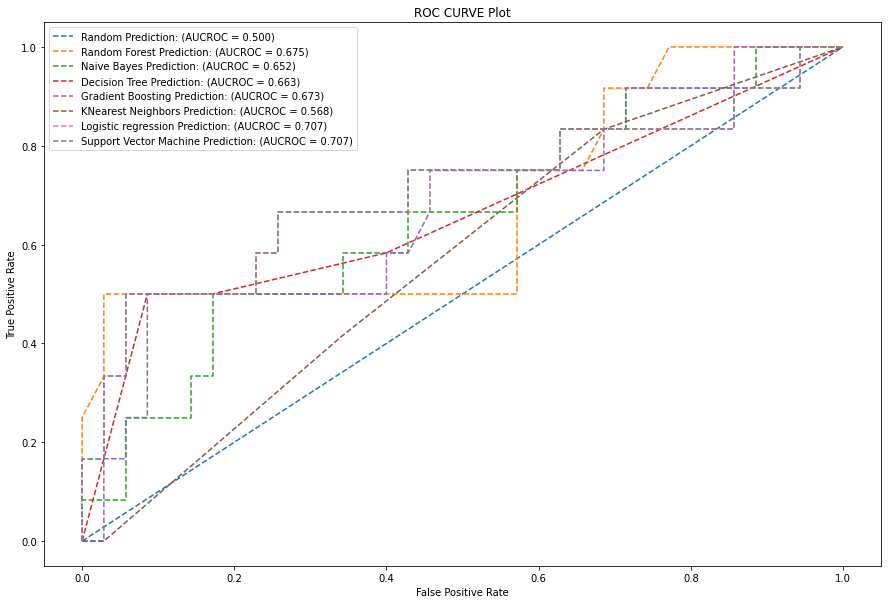

In [181]:
plt.figure(figsize=(15,10))
plt.plot(r_fpr,r_tpr,linestyle='--',label='Random Prediction: (AUCROC = %.3f)' %r_auc);
plt.plot(rf_fpr,rf_tpr,linestyle='--',label='Random Forest Prediction: (AUCROC = %.3f)' %rf_auc);
plt.plot(nb_fpr,nb_tpr,linestyle='--',label='Naive Bayes Prediction: (AUCROC = %.3f)' %nb_auc);
plt.plot(dt_fpr,dt_tpr,linestyle='--',label='Decision Tree Prediction: (AUCROC = %.3f)' %dt_auc);
plt.plot(gb_fpr,gb_tpr,linestyle='--',label='Gradient Boosting Prediction: (AUCROC = %.3f)' %gb_auc);
plt.plot(knn_fpr,knn_tpr,linestyle='--',label='KNearest Neighbors Prediction: (AUCROC = %.3f)' %knn_auc);
plt.plot(lr_fpr,lr_tpr,linestyle='--',label='Logistic regression Prediction: (AUCROC = %.3f)' %lr_auc);
plt.plot(svm_fpr,svm_tpr,linestyle='--',label='Support Vector Machine Prediction: (AUCROC = %.3f)' %svm_auc);

# Title
plt.title('ROC CURVE Plot')

#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Legend
plt.legend();